In [4]:
import pandas as pd
df0 = pd.read_csv(r"telecom_churn_data.csv") 

df0.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Define the important columns (without month suffix)
important_columns = {
    "mobile_number": "mobile_no",
    "total_og_mou": "outgoing_mou",
    "total_ic_mou": "incoming_mou",
    "onnet_mou": "onnet_usage",
    "arpu": "avg_revenue_per_user",
    "aon": "age_on_network",
    "fb_user": "facebook_user",
    "roam_og_mou": "roaming_outgoing_mou",
    "count_rech_3g": "recharge_count_3g",
    "loc_og_t2t_mou": "local_og_same_network_mou",
    "loc_ic_mou": "local_incoming_mou",
    "loc_ic_t2m_mou": "local_incoming_to_mobile_mou",
    "vol_3g_mb": "data_usage_3g_mb",
    "monthly_3g": "monthly_data_plan_3g",
    "max_rech_data": "max_data_recharge_amt",
    "av_rech_amt_data": "avg_data_recharge_amt",
    "arpu_2g": "avg_revenue_2g",
    "arpu_3g": "avg_revenue_3g",
    "std_og_t2t_mou": "std_og_same_network_mou",
    "last_day_rch_amt": "last_day_recharge_amt",
    "std_og_t2m_mou": "std_og_to_mobile_mou",
    "isd_og_mou": "isd_outgoing_mou",
    "loc_og_mou": "local_outgoing_mou",
    "loc_og_t2m_mou": "local_outgoing_to_mobile_mou",
    "total_rech_num": "total_recharge_count",
    "std_og_mou": "std_outgoing_mou",
    "max_rech_amt": "max_recharge_amt",
    "offnet_mou": "off_network_mou",
    "total_og_mou": "total_outgoing_mou",
    "total_rech_amt": "total_recharge_amt"
}

# Define months
months = [6, 7, 8, 9]

# Create a list of full column names to keep
columns_to_keep = ["mobile_number", "aon"]  # These are common across months
for month in months:
    for col in important_columns.keys():
        if col not in ["mobile_number", "aon"]:  # Avoid duplicating non-monthly columns
            columns_to_keep.append(f"{col}_{month}")



In [6]:
df_filtered = df0[columns_to_keep]

In [7]:
# Dictionary to store month-wise DataFrames
dfs = {}

for month in months:
    # Generate column mappings dynamically for the given month
    month_col_mapping = {f"{col}_{month}": new_col for col, new_col in important_columns.items() if col not in ["mobile_number", "aon"]}
    
    # Ensure 'mobile_number' and 'aon' remain consistent across all months
    month_col_mapping["mobile_number"] = "mobile_no"
    month_col_mapping["aon"] = "age_on_network"

    # Select relevant columns and rename them
    dfs[month] = df_filtered[list(month_col_mapping.keys())].rename(columns=month_col_mapping)

# Assign to specific month variables
df_june = dfs[6]
df_july = dfs[7]
df_august = dfs[8]
df_september = dfs[9]

In [8]:
df_june.isnull().sum()

total_outgoing_mou                  0
incoming_mou                        0
onnet_usage                      3937
avg_revenue_per_user                0
facebook_user                   74846
roaming_outgoing_mou             3937
recharge_count_3g               74846
local_og_same_network_mou        3937
local_incoming_mou               3937
local_incoming_to_mobile_mou     3937
data_usage_3g_mb                    0
monthly_data_plan_3g                0
max_data_recharge_amt           74846
avg_data_recharge_amt           74846
avg_revenue_2g                  74846
avg_revenue_3g                  74846
std_og_same_network_mou          3937
last_day_recharge_amt               0
std_og_to_mobile_mou             3937
isd_outgoing_mou                 3937
local_outgoing_mou               3937
local_outgoing_to_mobile_mou     3937
total_recharge_count                0
std_outgoing_mou                 3937
max_recharge_amt                    0
off_network_mou                  3937
total_rechar

In [9]:
def drop_high_nan_columns(df, threshold=0.60):
    """
    Drops columns with more than `threshold`% missing values.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    threshold (float): Percentage threshold (e.g., 0.60 for 60%).

    Returns:
    pd.DataFrame: Cleaned DataFrame with columns dropped.
    """
    initial_cols = set(df.columns)  # Store original columns
    
    # Drop columns where missing values exceed threshold
    df_cleaned = df.dropna(axis=1, thresh=int(threshold * len(df)))
    
    # Identify dropped columns
    dropped_cols = initial_cols - set(df_cleaned.columns)
    print(f"Columns dropped ({len(dropped_cols)}):", dropped_cols)
    
    return df_cleaned


In [10]:
# Set the threshold (e.g., 60% missing values)
threshold = 0.60

df_june = drop_high_nan_columns(df_june, threshold)
df_july = drop_high_nan_columns(df_july, threshold)
df_august = drop_high_nan_columns(df_august, threshold)
df_september = drop_high_nan_columns(df_september, threshold)


Columns dropped (6): {'facebook_user', 'avg_revenue_3g', 'recharge_count_3g', 'avg_revenue_2g', 'max_data_recharge_amt', 'avg_data_recharge_amt'}
Columns dropped (6): {'facebook_user', 'avg_revenue_3g', 'recharge_count_3g', 'avg_revenue_2g', 'max_data_recharge_amt', 'avg_data_recharge_amt'}
Columns dropped (6): {'facebook_user', 'avg_revenue_3g', 'recharge_count_3g', 'avg_revenue_2g', 'max_data_recharge_amt', 'avg_data_recharge_amt'}
Columns dropped (6): {'facebook_user', 'avg_revenue_3g', 'recharge_count_3g', 'avg_revenue_2g', 'max_data_recharge_amt', 'avg_data_recharge_amt'}


In [11]:
df_june.isnull().sum()

total_outgoing_mou                 0
incoming_mou                       0
onnet_usage                     3937
avg_revenue_per_user               0
roaming_outgoing_mou            3937
local_og_same_network_mou       3937
local_incoming_mou              3937
local_incoming_to_mobile_mou    3937
data_usage_3g_mb                   0
monthly_data_plan_3g               0
std_og_same_network_mou         3937
last_day_recharge_amt              0
std_og_to_mobile_mou            3937
isd_outgoing_mou                3937
local_outgoing_mou              3937
local_outgoing_to_mobile_mou    3937
total_recharge_count               0
std_outgoing_mou                3937
max_recharge_amt                   0
off_network_mou                 3937
total_recharge_amt                 0
mobile_no                          0
age_on_network                     0
dtype: int64

In [12]:
import numpy as np

def fill_na_with_median(df):
    """
    Fills NaN values in a DataFrame with the median of each column.
    - Whole numbers stay as integers
    - Decimal numbers are rounded to 3 places

    Args:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    pd.DataFrame: DataFrame with NaNs replaced by median values.
    """
    na_counts = df.isnull().sum().sum()  # Count total NaNs before filling

    for col in df.columns:
        if df[col].dtype in [np.int64, np.int32, 'int']:  # Whole numbers
            median_value = int(df[col].median())  # Keep as integer
        else:  # Float columns
            median_value = round(df[col].median(), 3)  # Round to 3 decimals

        df[col].fillna(median_value, inplace=True)

    print(f"Filled {na_counts} NaN values with median.")
    
    return df


In [13]:
df_june = fill_na_with_median(df_june)
df_july = fill_na_with_median(df_july)
df_august = fill_na_with_median(df_august)
df_september = fill_na_with_median(df_september)
print("Remaining NaN values in df_june:", df_june.isnull().sum().sum())  
print("Remaining NaN values in df_july:", df_july.isnull().sum().sum())  
print("Remaining NaN values in df_august:", df_august.isnull().sum().sum())  
print("Remaining NaN values in df_september:", df_september.isnull().sum().sum())  


Filled 47244 NaN values with median.
Filled 46308 NaN values with median.
Filled 64536 NaN values with median.
Filled 92940 NaN values with median.
Remaining NaN values in df_june: 0
Remaining NaN values in df_july: 0
Remaining NaN values in df_august: 0
Remaining NaN values in df_september: 0


C:\Users\User\AppData\Local\Temp\ipykernel_9312\2945406102.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9312\2945406102.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_value, inplace=True)


In [14]:
df_june.describe()

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000
mean,305.133424,200.130037,128.534195,282.987358,13.363643,45.715288,164.525246,105.468325,121.396219,0.075921,...,0.766849,141.087324,91.282541,7.558806,162.094979,104.637486,193.934538,327.514615,7.001207e+09,1219.854749
std,463.419481,291.651671,291.921906,328.439770,70.074931,148.015207,249.501742,168.591539,544.247227,0.363371,...,25.253433,247.224843,159.867997,7.078405,383.406921,120.614894,311.179884,398.019701,6.956694e+05,954.733842
min,0.000000,0.000000,0.000000,-2258.709000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09,180.000000
25%,44.740000,38.530000,8.030000,93.411500,0.000000,1.910000,32.440000,18.560000,0.000000,0.000000,...,0.000000,18.610000,10.760000,3.000000,0.000000,30.000000,36.720000,109.000000,7.000606e+09,467.000000
50%,145.140000,114.740000,34.310000,197.704000,0.000000,11.910000,92.160000,56.490000,0.000000,0.000000,...,0.000000,65.110000,41.030000,6.000000,11.640000,110.000000,96.310000,230.000000,7.001205e+09,863.000000
75%,372.860000,251.670000,112.610000,371.060000,0.000000,38.820000,200.580000,127.600000,0.000000,0.000000,...,0.000000,161.920000,105.780000,9.000000,132.490000,120.000000,222.535000,437.500000,7.001812e+09,1807.500000
max,10674.030000,7716.140000,7376.710000,27731.088000,3775.110000,6431.330000,7454.630000,4693.860000,45735.400000,14.000000,...,5900.660000,10643.380000,4729.740000,307.000000,8432.990000,4010.000000,8362.360000,35190.000000,7.002411e+09,4337.000000


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Function to remove outliers based on IQR for AON & ARPU only
def remove_outliers(df):
    cols_to_check = ['age_on_network', 'avg_revenue_per_user']
    
    Q1 = df[cols_to_check].quantile(0.25)
    Q3 = df[cols_to_check].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)]

# Function to apply RobustScaler while excluding AON & ARPU
def apply_robust_scaler(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Exclude 'mobile_no', 'age_on_network', and 'avg_revenue_per_user' from scaling
    exclude_cols = ['mobile_no', 'age_on_network', 'avg_revenue_per_user']
    cols_to_scale = [col for col in num_cols if col not in exclude_cols]

    # Apply RobustScaler
    scaler = RobustScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])  

    return df

# **Apply IQR outlier removal for AON & ARPU before transformation**
df_june = remove_outliers(df_june)
df_july = remove_outliers(df_july)
df_august = remove_outliers(df_august)
df_september = remove_outliers(df_september)

# **Apply RobustScaler to all other features**
df_june = apply_robust_scaler(df_june)
df_july = apply_robust_scaler(df_july)
df_august = apply_robust_scaler(df_august)
df_september = apply_robust_scaler(df_september)

# **Fix NaN values in 'onnet_usage' and ensure ARPU has no negatives**
for df in [df_june, df_july, df_august, df_september]:
    df['onnet_usage'].fillna(0, inplace=True)
    df.loc[df['avg_revenue_per_user'] < 0, 'avg_revenue_per_user'] = 0  # Replace negative revenue with 0



C:\Users\User\AppData\Local\Temp\ipykernel_9312\2828422774.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['onnet_usage'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9312\2828422774.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [16]:
df_september

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
0,-0.398156,-0.521475,0.000000,21.100,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,-0.476190,0.000000,-0.565625,7000842753,968
1,-0.144390,0.462255,-0.146497,86.285,0.00,0.237425,0.569639,0.003417,0.00,0.0,...,0.0,0.087219,0.184965,0.000000,-0.091353,0.000000,-0.226203,-0.187500,7001865778,1006
2,0.041526,2.187078,0.572866,290.714,70.94,0.104963,1.776106,-0.188254,8.42,0.0,...,0.0,0.025223,-0.138471,0.333333,0.104606,0.476190,0.213317,0.553125,7001625959,1103
3,0.877675,1.076118,2.698981,389.500,0.00,0.141851,0.479773,-0.040043,0.00,0.0,...,0.0,0.179958,0.332786,1.500000,2.474473,0.000000,0.177090,0.715625,7001204172,2491
4,-0.030089,0.552603,0.368662,163.426,0.00,1.593561,0.778066,-0.089375,0.00,0.0,...,0.0,0.312272,-0.015540,-0.166667,-0.091353,0.000000,-0.279835,0.059375,7000142493,1526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.302646,0.286424,-0.380127,29.950,0.00,-0.377599,0.439460,0.280619,0.00,0.0,...,0.0,-0.295626,-0.181175,-0.500000,-0.091353,0.000000,-0.405788,-0.409375,7001548952,3199
99995,-0.023684,0.047920,0.250318,140.835,4.23,1.282025,0.111772,0.072931,0.00,0.0,...,0.0,0.319745,0.095894,-0.666667,-0.070715,-0.190476,-0.210214,-0.471875,7000607688,2052
99996,-0.398156,-0.521475,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.000000,0.000000,-0.666667,0.000000,-0.476190,0.000000,-0.565625,7000087541,185
99997,-0.398156,-0.509914,-0.380127,731.010,0.00,-0.377599,-0.625910,-0.580886,4177.14,4.0,...,0.0,-0.525180,-0.494251,0.166667,-0.091353,1.923810,-0.588882,2.128125,7000498689,478


In [17]:
df_august.describe()

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
count,94304.000000,9.430400e+04,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,...,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,94304.000000,9.430400e+04,94304.000000
mean,0.402807,3.885938e-01,0.796907,223.894787,6.581722,0.801804,0.389315,0.403511,103.939803,0.059170,...,0.216926,0.422159,0.421878,0.277208,1.086195,0.308533,0.388777,0.195432,7.001205e+09,1213.862392
std,1.104808,1.370564e+00,2.431510,186.156310,35.114358,3.576773,1.508810,1.535026,399.435062,0.283546,...,3.906197,1.444740,1.335371,1.034625,2.493351,1.029075,1.295361,0.763867,6.966387e+05,949.362585
min,-0.440845,-5.469226e-01,-0.381323,0.000000,0.000000,-0.370792,-0.615824,-0.581238,0.000000,0.000000,...,0.000000,-0.513527,-0.486265,-0.833333,-0.099717,-0.670000,-0.592826,-0.654723,7.000000e+09,180.000000
25%,-0.319833,-3.665956e-01,-0.304169,78.939000,0.000000,-0.317686,-0.394448,-0.385030,0.000000,0.000000,...,0.000000,-0.372273,-0.364217,-0.333333,-0.099717,-0.370000,-0.388612,-0.384365,7.000603e+09,466.000000
50%,0.000000,3.608360e-17,0.000000,177.764500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.001200e+09,859.000000
75%,0.680167,6.334044e-01,0.695831,329.030750,0.000000,0.682314,0.605552,0.614970,0.000000,0.000000,...,0.000000,0.627727,0.635783,0.666667,0.900283,0.630000,0.611388,0.615635,7.001812e+09,1798.000000
max,18.033377,5.445196e+01,61.646782,797.211000,1175.690000,166.022760,70.464542,62.035429,28919.680000,9.000000,...,358.880000,41.901896,29.985904,13.833333,35.701614,43.820000,23.069133,21.162866,7.002411e+09,3788.000000


In [18]:
df_june.columns

Index(['total_outgoing_mou', 'incoming_mou', 'onnet_usage',
       'avg_revenue_per_user', 'roaming_outgoing_mou',
       'local_og_same_network_mou', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g', 'std_og_same_network_mou',
       'last_day_recharge_amt', 'std_og_to_mobile_mou', 'isd_outgoing_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou', 'max_recharge_amt',
       'off_network_mou', 'total_recharge_amt', 'mobile_no', 'age_on_network'],
      dtype='object')

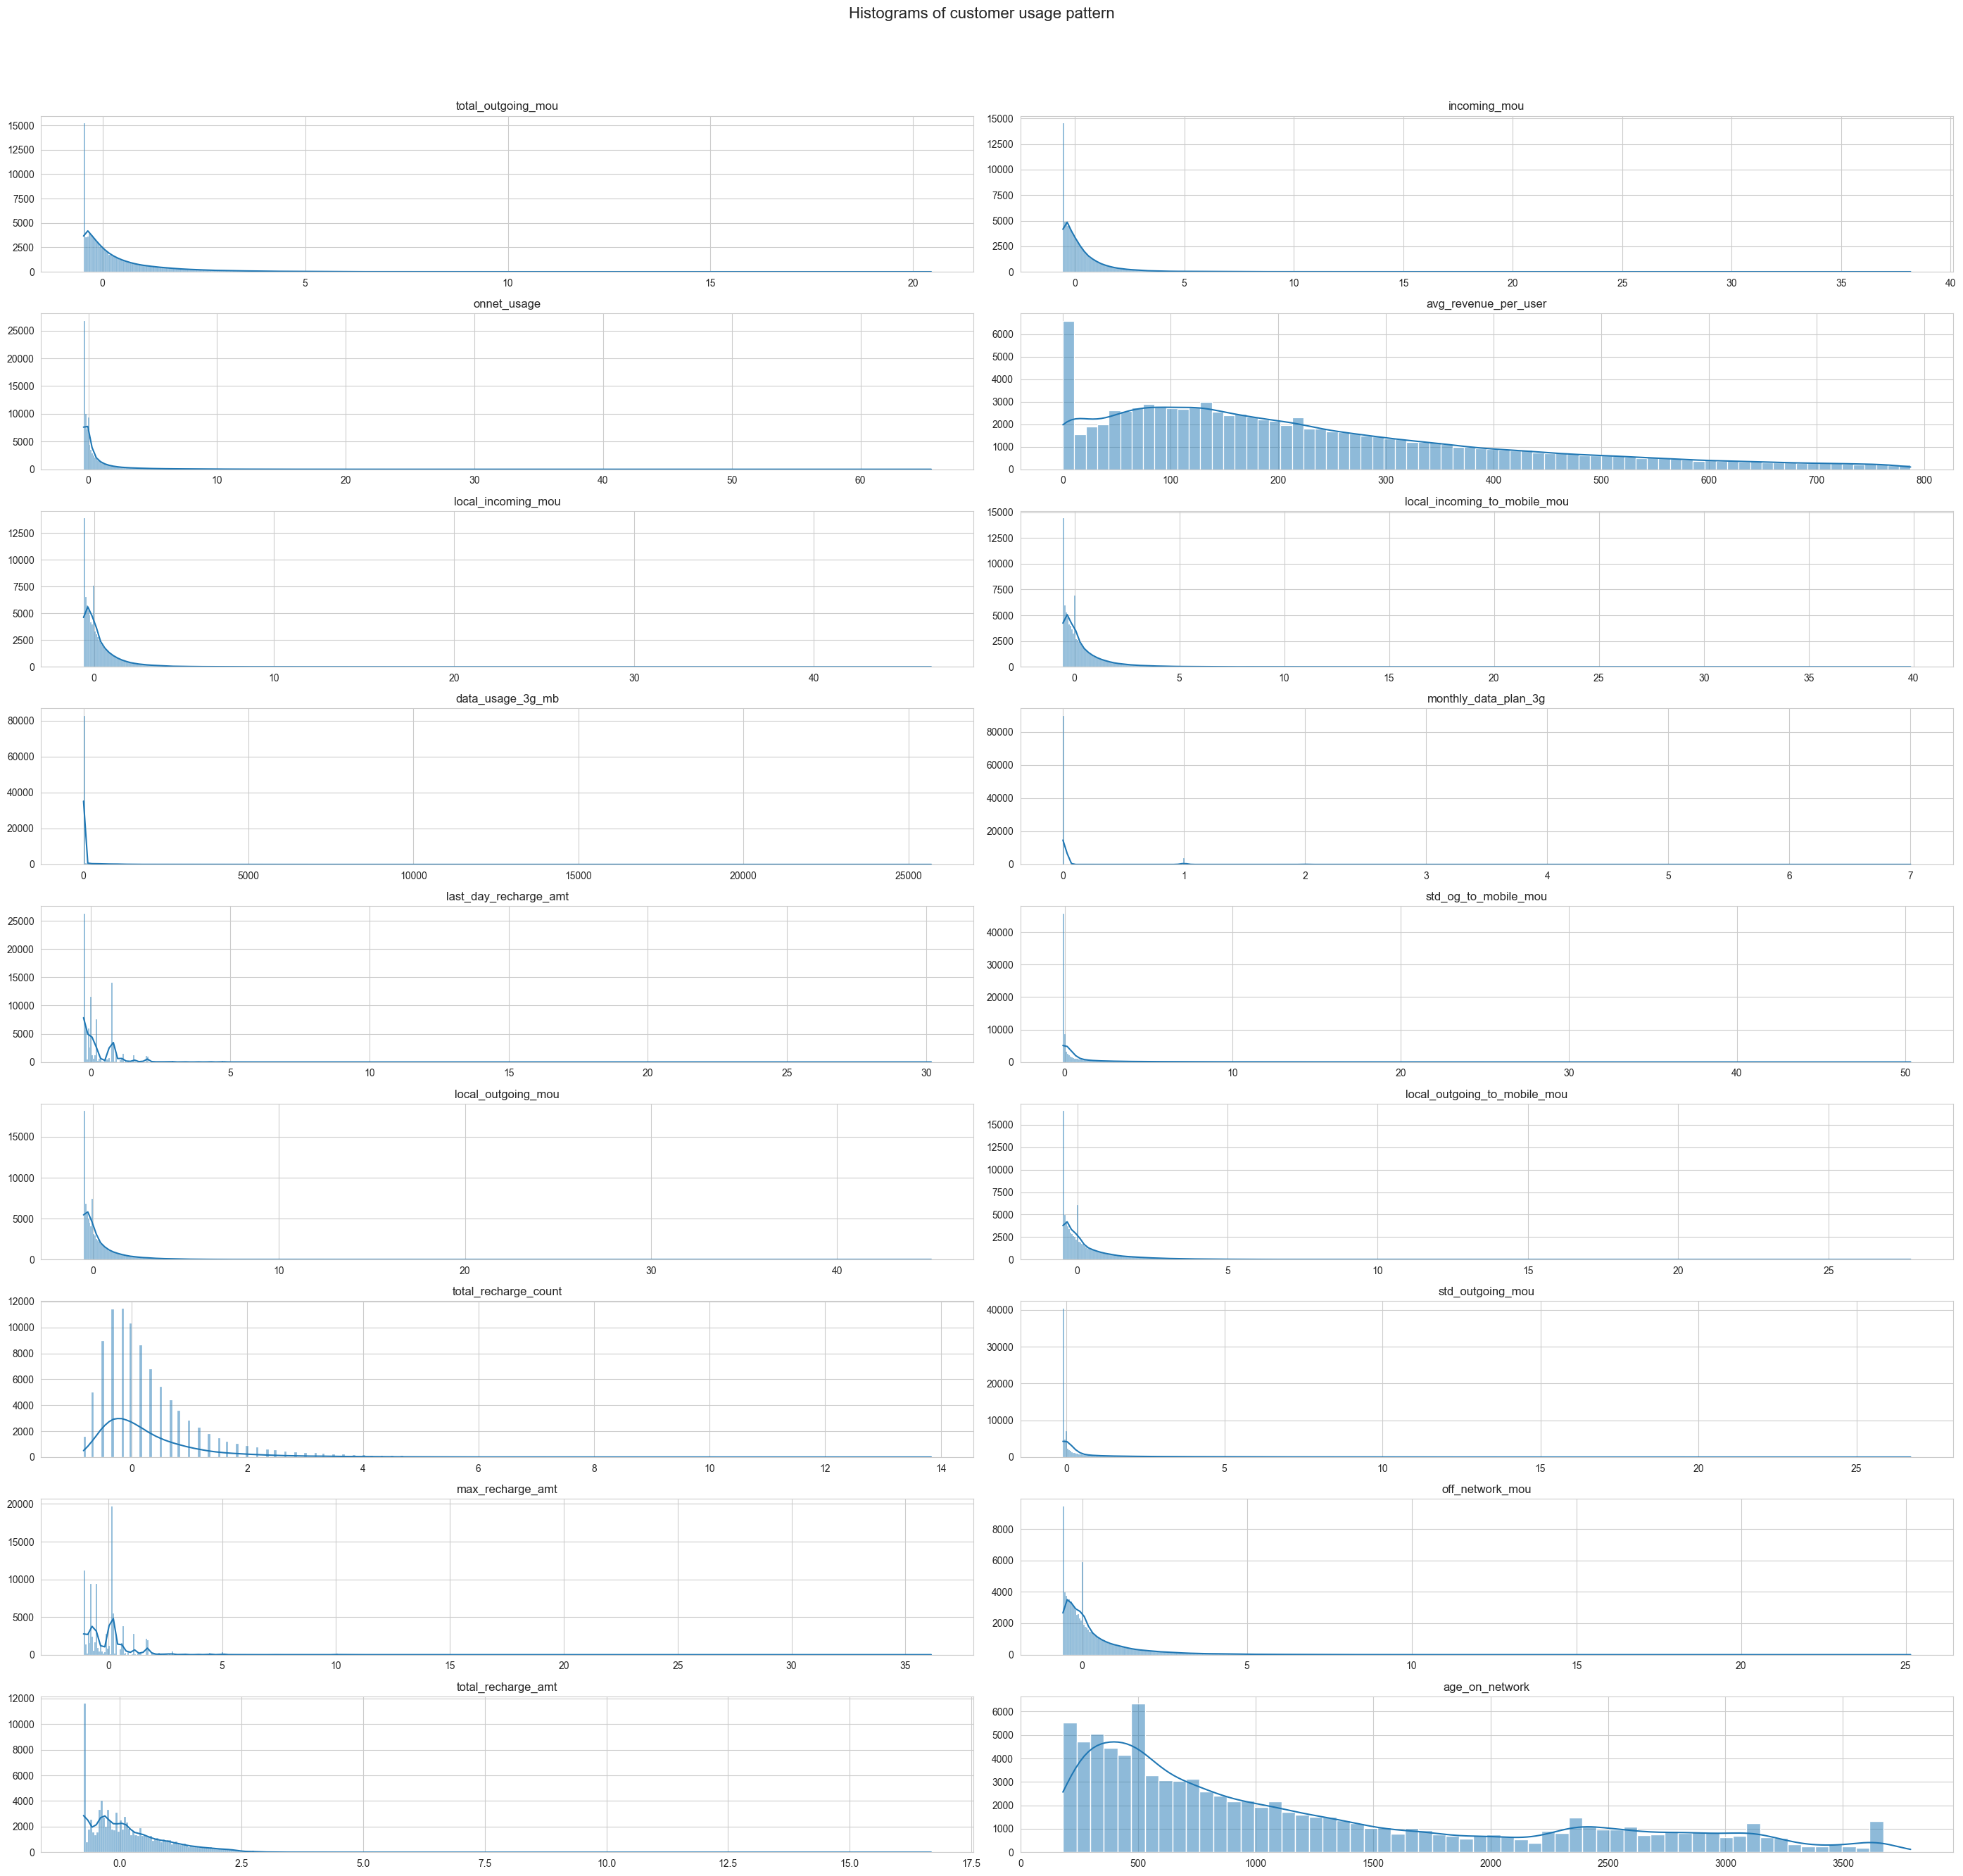

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(28, 28))
fig.suptitle('Histograms of customer usage pattern', fontsize=16)

cols = ['total_outgoing_mou', 'incoming_mou', 'onnet_usage',
       'avg_revenue_per_user', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g',
       'last_day_recharge_amt', 'std_og_to_mobile_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou', 'max_recharge_amt',
       'off_network_mou', 'total_recharge_amt', 'age_on_network']

for i, col in enumerate(cols):
    sns.histplot(df_june[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

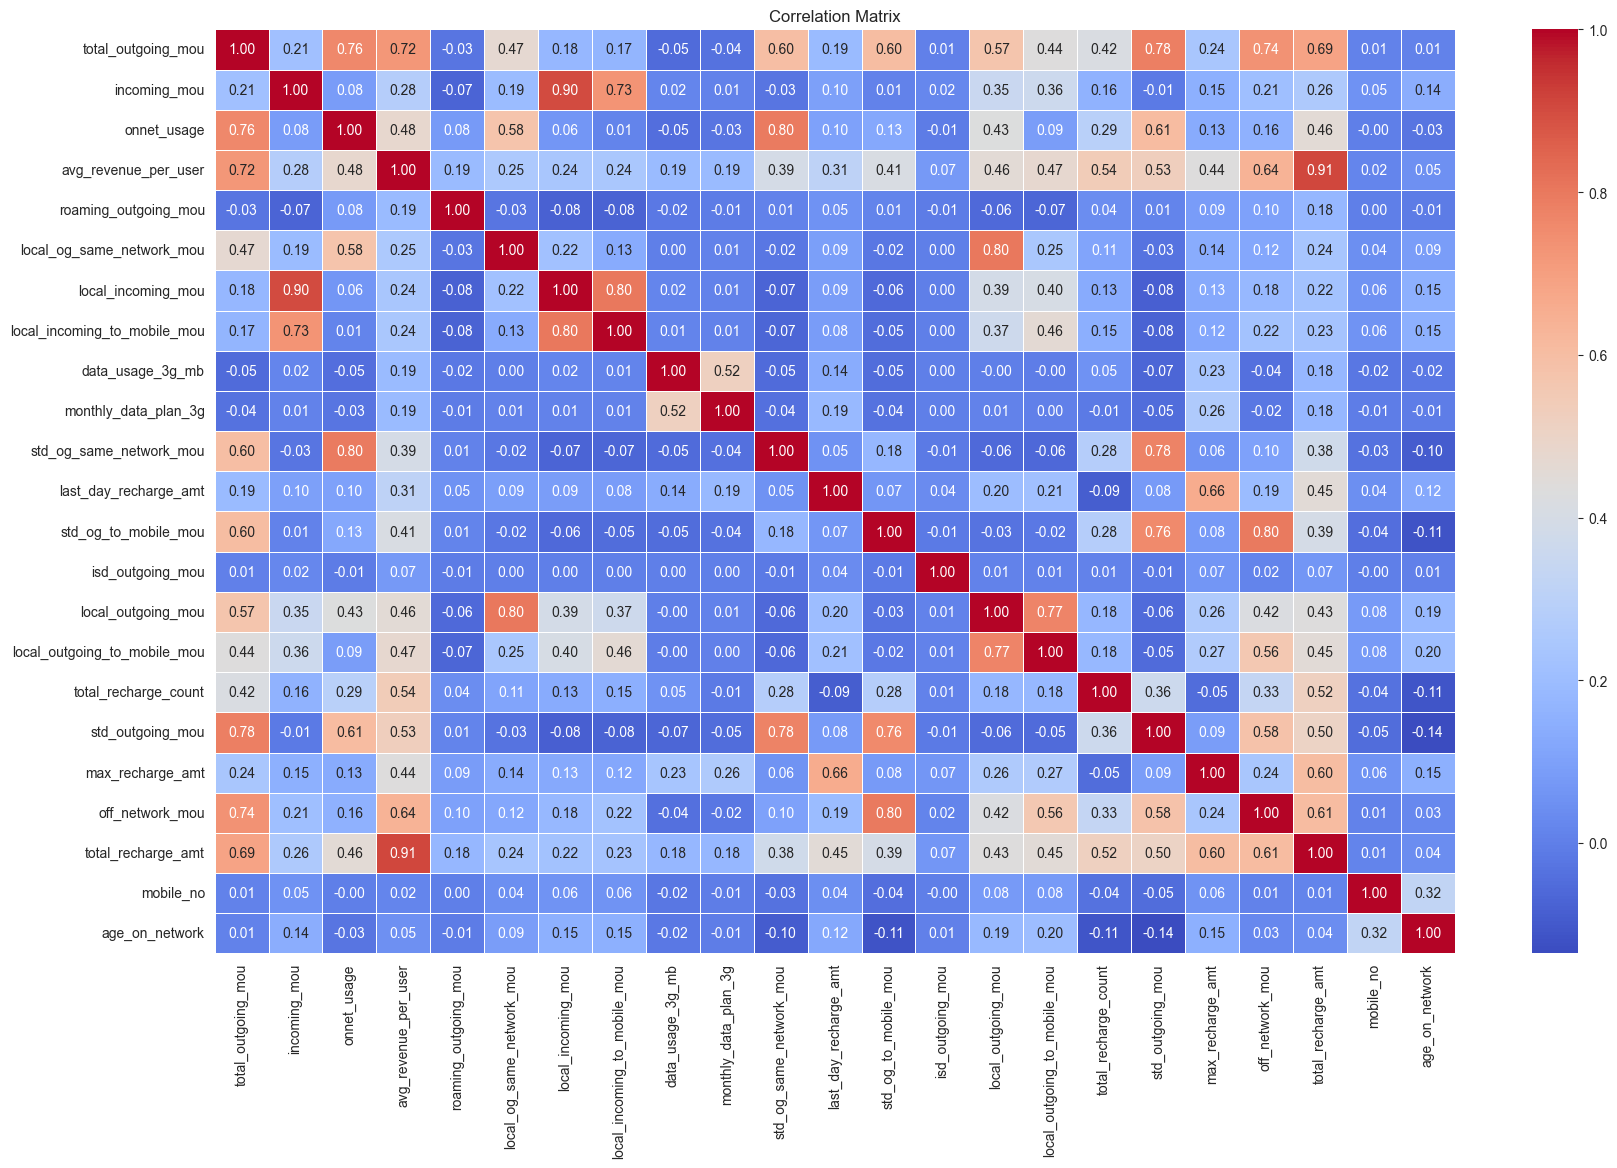

                              total_outgoing_mou  incoming_mou  onnet_usage  \
total_outgoing_mou                      1.000000      0.214431     0.760660   
incoming_mou                            0.214431      1.000000     0.084877   
onnet_usage                             0.760660      0.084877     1.000000   
avg_revenue_per_user                    0.721290      0.278582     0.479888   
roaming_outgoing_mou                   -0.025551     -0.069980     0.077426   
local_og_same_network_mou               0.469479      0.194179     0.576460   
local_incoming_mou                      0.176110      0.899828     0.064613   
local_incoming_to_mobile_mou            0.169544      0.729909     0.014710   
data_usage_3g_mb                       -0.054815      0.017730    -0.045208   
monthly_data_plan_3g                   -0.036223      0.009573    -0.027191   
std_og_same_network_mou                 0.600582     -0.027095     0.795469   
last_day_recharge_amt                   0.189783    

In [20]:
# Correlation matrix
correlation_matrix = df_june.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [21]:
# 1. Calculate the absolute correlation matrix
corr_matrix = df_june.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
df_june_reduced = df_june.drop(columns=to_drop)

print(f"Original number of columns: {df_june.shape[1]}")
print(f"Columns dropped: {to_drop}")
print(f"Number of columns after reduction: {df_june_reduced.shape[1]}")

Original number of columns: 23
Columns dropped: ['local_incoming_mou', 'local_incoming_to_mobile_mou', 'local_outgoing_mou', 'total_recharge_amt']
Number of columns after reduction: 19


In [22]:
df_june.columns

Index(['total_outgoing_mou', 'incoming_mou', 'onnet_usage',
       'avg_revenue_per_user', 'roaming_outgoing_mou',
       'local_og_same_network_mou', 'local_incoming_mou',
       'local_incoming_to_mobile_mou', 'data_usage_3g_mb',
       'monthly_data_plan_3g', 'std_og_same_network_mou',
       'last_day_recharge_amt', 'std_og_to_mobile_mou', 'isd_outgoing_mou',
       'local_outgoing_mou', 'local_outgoing_to_mobile_mou',
       'total_recharge_count', 'std_outgoing_mou', 'max_recharge_amt',
       'off_network_mou', 'total_recharge_amt', 'mobile_no', 'age_on_network'],
      dtype='object')


Performance for ARPU Prediction:
               Model  CV R2 Score        MAE          MSE       RMSE  \
4            XGBoost     0.926817  28.594088  2353.422980  48.512091   
2      Random Forest     0.922503  28.785235  2475.455276  49.753947   
3  Gradient Boosting     0.918526  31.935787  2676.184330  51.731850   
0  Linear Regression     0.873821  40.581255  4101.328790  64.041618   
1      Decision Tree     0.846642  40.804399  4929.798198  70.212522   

   Test R2 Score  
4       0.929783  
2       0.926142  
3       0.920153  
0       0.877632  
1       0.852914  


C:\Users\User\AppData\Local\Temp\ipykernel_9312\182638202.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=arpu_results, x='Model', y='Test R2 Score', palette='viridis')


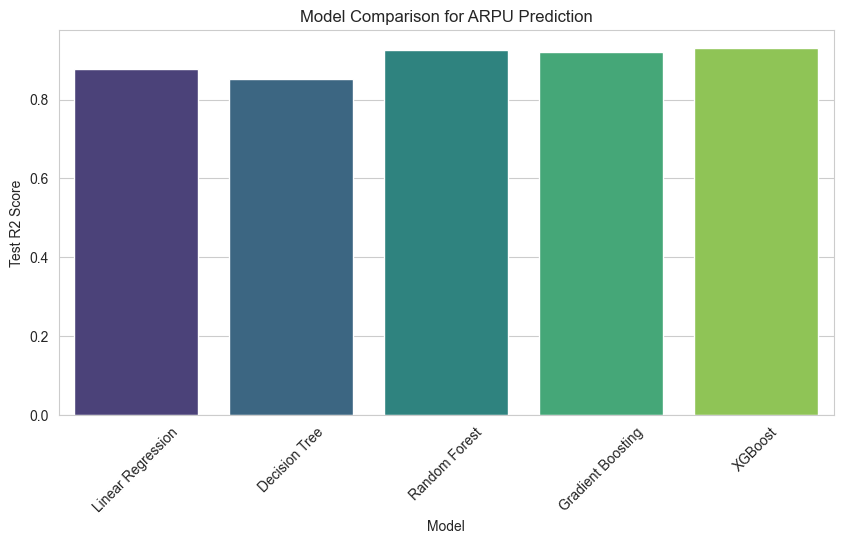

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = df_june.copy()
# Features & Target for ARPU (Avoid future-dependent variables)
X_arpu = df.drop('avg_revenue_per_user', axis=1)
y_arpu = df['avg_revenue_per_user']

# Train-Test Split (80-20)
X_arpu_train, X_arpu_test, y_arpu_train, y_arpu_test = train_test_split(X_arpu, y_arpu, test_size=0.2, random_state=42)

# Define Models
arpu_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Cross-validation & Model Evaluation
def evaluate_models_cv(models, X_train, y_train, X_test, y_test, target_name):
    results = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Cross-validation score
        cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2').mean()

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append([name, cv_r2, mae, mse, rmse, r2])

    results_df = pd.DataFrame(results, columns=['Model', 'CV R2 Score', 'MAE', 'MSE', 'RMSE', 'Test R2 Score'])
    print(f"\nPerformance for {target_name} Prediction:")
    print(results_df.sort_values(by='Test R2 Score', ascending=False))
    return results_df

# Evaluate ARPU Models
arpu_results = evaluate_models_cv(arpu_models, X_arpu_train, y_arpu_train, X_arpu_test, y_arpu_test, "ARPU")

# Plot Model Comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=arpu_results, x='Model', y='Test R2 Score', palette='viridis')
plt.title('Model Comparison for ARPU Prediction')
plt.xticks(rotation=45)
plt.show()


In [25]:
"""
import joblib
joblib.dump(arpu_models['Random Forest'], 'arpu_random_forest_model.pkl')
joblib.dump(arpu_models['XGBoost'], 'arpu_xgboost_model.pkl')
joblib.dump(arpu_models['Gradient Boosting'], 'arpu_gradient_boosting_model.pkl')
joblib.dump(arpu_models['Linear Regression'], 'arpu_linear_regression_model.pkl')
joblib.dump(arpu_models['Decision Tree'], 'arpu_decision_tree_model.pkl')
"""


"\nimport joblib\njoblib.dump(arpu_models['Random Forest'], 'arpu_random_forest_model.pkl')\njoblib.dump(arpu_models['XGBoost'], 'arpu_xgboost_model.pkl')\njoblib.dump(arpu_models['Gradient Boosting'], 'arpu_gradient_boosting_model.pkl')\njoblib.dump(arpu_models['Linear Regression'], 'arpu_linear_regression_model.pkl')\njoblib.dump(arpu_models['Decision Tree'], 'arpu_decision_tree_model.pkl')\n"

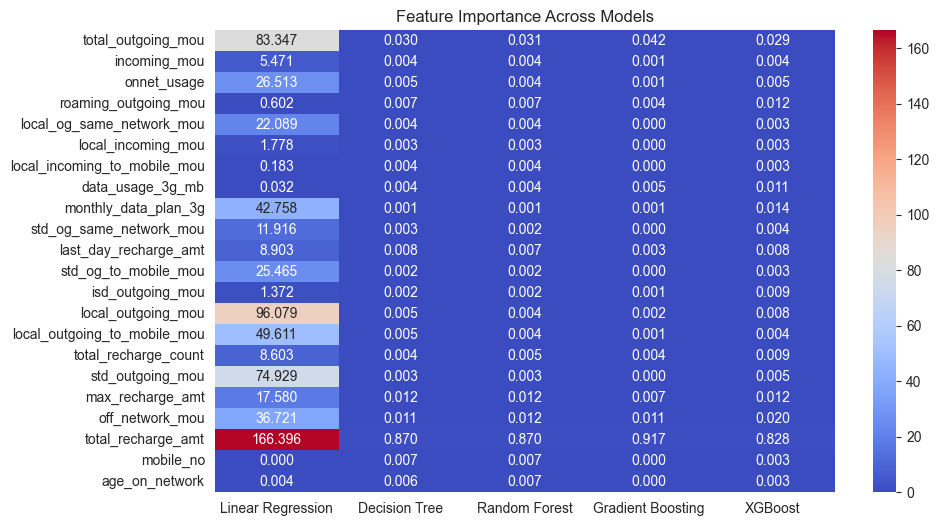

In [26]:
from sklearn.inspection import permutation_importance

# Train models on CLV prediction
feature_importances = {}

for name, model in arpu_models.items():
    model.fit(X_arpu_train, y_arpu_train)
    
    # Extract feature importance
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    else:  # For linear regression
        importance = np.abs(model.coef_)
    
    feature_importances[name] = importance

# Convert to DataFrame
feature_importance_df = pd.DataFrame(feature_importances, index=X_arpu_train.columns)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance_df, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Feature Importance Across Models")
plt.show()


In [27]:
df_august

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,isd_outgoing_mou,local_outgoing_mou,local_outgoing_to_mobile_mou,total_recharge_count,std_outgoing_mou,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network
0,-0.440845,-0.519297,-0.381323,213.803,0.00,-0.370792,-0.580120,-0.540020,109.61,1.0,...,0.0,-0.513527,-0.486265,-0.500000,-0.099717,1.85,-0.592826,0.166124,7000842753,968
1,0.655705,1.602580,-0.290823,268.321,0.00,-0.128023,2.064779,3.167066,0.00,0.0,...,0.0,1.900123,3.030120,1.000000,-0.098472,-0.02,1.367991,0.267101,7001865778,1006
2,0.561015,1.459120,0.057740,210.226,0.00,0.058480,0.407968,-0.193114,0.00,0.0,...,0.0,0.031667,-0.022892,-0.500000,1.058767,0.19,0.747756,-0.276873,7001625959,1103
3,0.795283,-0.277118,3.283193,508.054,39.04,-0.035404,-0.299609,-0.378842,0.00,0.0,...,0.0,-0.207409,-0.215663,2.166667,2.736721,-0.17,-0.131639,1.302932,7001204172,2491
4,0.289720,1.173624,0.607218,238.174,0.00,2.281018,1.602140,0.457984,0.00,0.0,...,0.0,1.163796,1.010843,-0.333333,-0.099717,0.43,0.206659,0.280130,7000142493,1526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.234795,0.269805,-0.311681,57.530,0.00,-0.183973,0.439734,0.178044,0.00,0.0,...,0.0,-0.066397,0.111084,-0.500000,-0.099717,-0.67,-0.253177,-0.654723,7001548952,3199
99995,-0.151441,-0.202570,-0.192075,79.081,0.00,0.136874,-0.176550,-0.072455,0.00,0.0,...,0.0,0.126347,0.206627,-0.500000,-0.099717,0.82,-0.165675,-0.061889,7000607688,2052
99996,-0.440845,-0.546923,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.000000,0.000000,-0.833333,0.000000,-0.67,0.000000,-0.654723,7000087541,185
99997,-0.440845,-0.535294,-0.381323,606.817,0.00,-0.370792,-0.604601,-0.564172,2683.30,4.0,...,0.0,-0.513527,-0.486265,-0.166667,-0.099717,1.12,-0.592826,1.677524,7000498689,478


In [36]:
test_df = df_august.copy()
test_df1 = test_df.drop('avg_revenue_per_user', axis=1)
test_df2 = df_july.copy()
test_df2 = test_df2.drop('avg_revenue_per_user', axis=1)
test_df3 = df_september.copy()
test_df3 = test_df3.drop('avg_revenue_per_user', axis=1)

In [38]:
def prediction_col(month_df, test_df, arpu_models):
    for model_name,model in arpu_models.items():
        column_name = 'prediction_'+ model_name
        month_df[column_name] = model.predict(test_df)
    return month_df

In [ ]:
df_august = prediction_col(df_august, test_df1, arpu_models)

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network,prediction_Linear Regression,prediction_Decision Tree,prediction_Random Forest,prediction_Gradient Boosting,prediction_XGBoost
0,-0.440845,-0.519297,-0.381323,213.803,0.00,-0.370792,-0.580120,-0.540020,109.61,1.0,...,1.85,-0.592826,0.166124,7000842753,968,165.395055,219.003,235.45268,209.126203,217.070801
1,0.655705,1.602580,-0.290823,268.321,0.00,-0.128023,2.064779,3.167066,0.00,0.0,...,-0.02,1.367991,0.267101,7001865778,1006,278.617293,265.034,271.61513,281.670087,273.940582
2,0.561015,1.459120,0.057740,210.226,0.00,0.058480,0.407968,-0.193114,0.00,0.0,...,0.19,0.747756,-0.276873,7001625959,1103,163.070890,375.418,176.66268,185.223406,184.171616
3,0.795283,-0.277118,3.283193,508.054,39.04,-0.035404,-0.299609,-0.378842,0.00,0.0,...,-0.17,-0.131639,1.302932,7001204172,2491,441.309991,460.149,512.51458,492.004671,500.016113
4,0.289720,1.173624,0.607218,238.174,0.00,2.281018,1.602140,0.457984,0.00,0.0,...,0.43,0.206659,0.280130,7000142493,1526,218.480773,253.747,215.06330,232.970400,223.834518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.234795,0.269805,-0.311681,57.530,0.00,-0.183973,0.439734,0.178044,0.00,0.0,...,-0.67,-0.253177,-0.654723,7001548952,3199,73.596717,60.883,71.60027,62.105212,65.831100
99995,-0.151441,-0.202570,-0.192075,79.081,0.00,0.136874,-0.176550,-0.072455,0.00,0.0,...,0.82,-0.165675,-0.061889,7000607688,2052,133.380546,106.149,155.87243,149.270800,115.711884
99996,-0.440845,-0.546923,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,-0.67,0.000000,-0.654723,7000087541,185,32.162809,22.085,35.27031,29.853923,24.482122
99997,-0.440845,-0.535294,-0.381323,606.817,0.00,-0.370792,-0.604601,-0.564172,2683.30,4.0,...,1.12,-0.592826,1.677524,7000498689,478,647.369349,620.506,570.23403,560.708446,525.423096


In [40]:
df_july = prediction_col(df_july, test_df2, arpu_models)
df_september = prediction_col(df_september, test_df3, arpu_models)

In [41]:
def accuracy_calculation(month_df, arpu_models):
    for model_name,model in arpu_models.items():
        column_name = 'prediction_'+ model_name
        mae = mean_absolute_error(month_df['avg_revenue_per_user'], month_df[column_name])
        mse = mean_squared_error(month_df['avg_revenue_per_user'], month_df[column_name])
        rmse = np.sqrt(mse)
        r2 = r2_score(month_df['avg_revenue_per_user'], month_df[column_name])
        print(f"Model: {model_name} | MAE: {mae:.3f} | MSE: {mse:.3f} | RMSE: {rmse:.3f} | R2: {r2:.3f}")

In [43]:
print("August Model Performance:")
print("--------------------------------")
accuracy_calculation(df_august, arpu_models)
print("--------------------------------")
print("July Model Performance:")
print("--------------------------------")
accuracy_calculation(df_july, arpu_models)
print("--------------------------------")   
print("September Model Performance:")
print("--------------------------------")
accuracy_calculation(df_september, arpu_models)

August Model Performance:
--------------------------------
Model: Linear Regression | MAE: 45.535 | MSE: 4571.089 | RMSE: 67.610 | R2: 0.868
Model: Decision Tree | MAE: 50.831 | MSE: 7131.075 | RMSE: 84.446 | R2: 0.794
Model: Random Forest | MAE: 37.901 | MSE: 3259.878 | RMSE: 57.095 | R2: 0.906
Model: Gradient Boosting | MAE: 36.110 | MSE: 3039.050 | RMSE: 55.128 | R2: 0.912
Model: XGBoost | MAE: 38.410 | MSE: 3427.484 | RMSE: 58.545 | R2: 0.901
--------------------------------
July Model Performance:
--------------------------------
Model: Linear Regression | MAE: 41.867 | MSE: 4120.366 | RMSE: 64.190 | R2: 0.875
Model: Decision Tree | MAE: 45.776 | MSE: 5614.140 | RMSE: 74.928 | R2: 0.830
Model: Random Forest | MAE: 32.943 | MSE: 2811.099 | RMSE: 53.020 | R2: 0.915
Model: Gradient Boosting | MAE: 33.654 | MSE: 2814.131 | RMSE: 53.048 | R2: 0.915
Model: XGBoost | MAE: 31.943 | MSE: 2697.710 | RMSE: 51.939 | R2: 0.918
--------------------------------
September Model Performance:
-----

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_predicted(df_data, model_name, month_name, actual_col='avg_revenue_per_user', sample_frac=0.1):
    # Set Seaborn style
    sns.set_style("whitegrid")
    
    # Dynamically define the predicted column name
    predicted_col = 'prediction_' + model_name
    
    if predicted_col not in df_data.columns:
        print(f"Error: Prediction column '{predicted_col}' not found in DataFrame.")
        return

    # Prepare data and apply sampling (using a copy for safety)
    df_plot = df_data[[actual_col, predicted_col]].copy()
    sampled_indices = df_plot.sample(frac=sample_frac, random_state=42).index
    
    actual_values = df_plot.loc[sampled_indices, actual_col]
    predicted_values = df_plot.loc[sampled_indices, predicted_col]

    # Create the Plot
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    
    # Use model_name and month_name for the titles
    fig.suptitle(f"Actual vs Predicted CLV for {month_name.title()} ({model_name})", fontsize=14)

    # Scatter Plot
    ax.scatter(actual_values, predicted_values, alpha=0.5, color="steelblue", label="Predicted vs Actual")

    # Perfect Prediction Line
    min_val = min(actual_values.min(), predicted_values.min())
    max_val = max(actual_values.max(), predicted_values.max())

    ax.plot([min_val, max_val], [min_val, max_val], 
            color='red', linestyle='--', label="Perfect Prediction")

    # Set Titles and Labels
    ax.set_title(f"{month_name.title()} ({model_name.title()})", fontsize=12)
    ax.set_xlabel(f"Actual {actual_col.upper().replace('_', ' ')}", fontsize=10)
    ax.set_ylabel(f"Predicted {actual_col.upper().replace('_', ' ')}", fontsize=10)
    ax.legend()
    ax.grid(True)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Generating plot for: Linear Regression


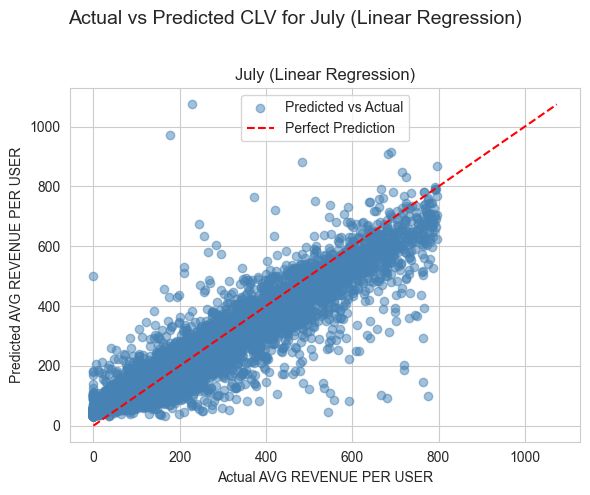

Generating plot for: Decision Tree


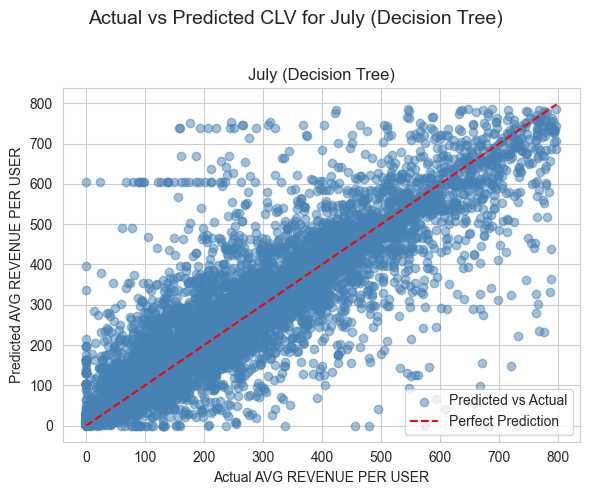

Generating plot for: Random Forest


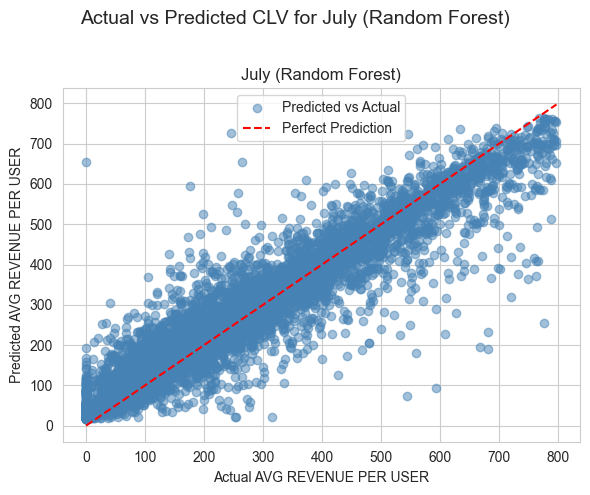

Generating plot for: Gradient Boosting


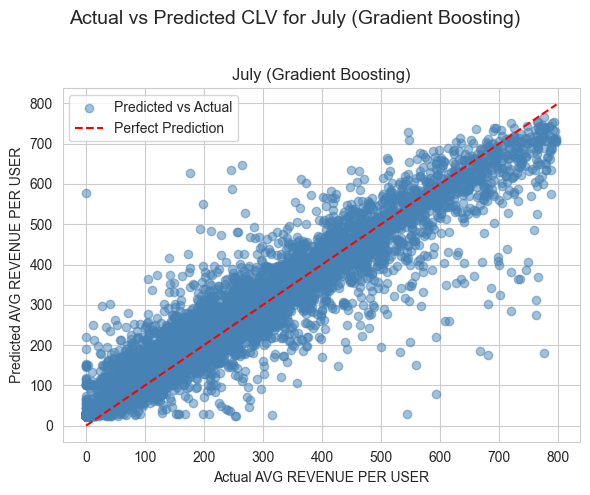

Generating plot for: XGBoost


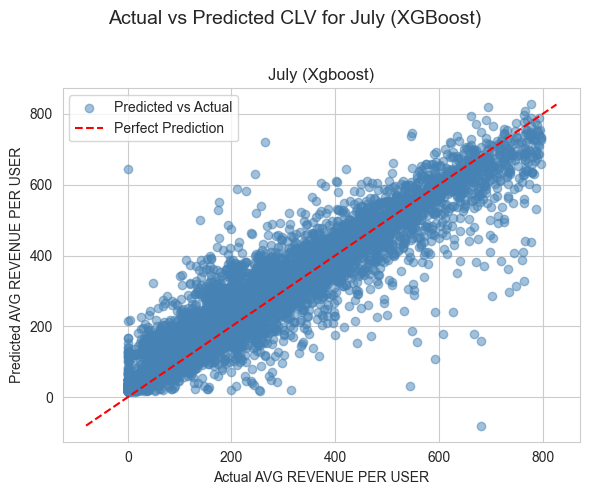

In [64]:
# The arpu_models dictionary contains the model names as keys
# The df_august DataFrame contains the prediction columns

MONTH_NAME = "july" # Use a variable for the month name

for model_name in arpu_models.keys():
    print(f"Generating plot for: {model_name}")
    
    plot_actual_vs_predicted(
        df_data=df_august, 
        model_name=model_name, 
        month_name=MONTH_NAME # Pass the fixed month name
    )

In [52]:
df_july

,total_outgoing_mou,incoming_mou,onnet_usage,avg_revenue_per_user,roaming_outgoing_mou,local_og_same_network_mou,local_incoming_mou,local_incoming_to_mobile_mou,data_usage_3g_mb,monthly_data_plan_3g,...,max_recharge_amt,off_network_mou,total_recharge_amt,mobile_no,age_on_network,prediction_Linear Regression,prediction_Decision Tree,prediction_Random Forest,prediction_Gradient Boosting,prediction_XGBoost
0,-0.448821,-0.560241,0.005218,214.816,0.00,0.000000,0.000000,0.000000,150.76,1.0,...,1.571429,0.013565,0.163194,7000842753,968,160.452535,358.131,226.92125,219.719101,215.585388
1,0.176788,-0.028807,0.542672,355.074,0.00,1.956184,0.075653,0.082398,0.00,0.0,...,0.571429,0.064581,0.621528,7001865778,1006,272.665061,360.486,339.64612,316.789908,325.023285
2,0.998213,2.088666,0.270872,189.058,0.00,0.532318,0.753352,-0.413382,0.00,0.0,...,1.040816,0.824636,0.381944,7001625959,1103,278.321441,282.576,255.59895,281.632223,309.154053
3,0.025336,0.544180,0.261016,251.102,28.09,0.720945,0.123324,0.073762,0.00,0.0,...,-0.489796,0.122301,0.364583,7001204172,2491,267.617769,268.674,279.18590,269.514702,266.517059
4,0.396853,0.450772,1.363173,309.876,0.00,4.283095,0.683270,0.520798,0.00,0.0,...,0.122449,0.014477,0.503472,7000142493,1526,258.965753,281.056,260.48689,266.313622,272.701691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.235624,-0.188650,-0.330705,69.161,0.00,-0.256370,-0.127405,-0.100764,0.00,0.0,...,0.122449,-0.221061,-0.329861,7001548952,3199,113.510568,117.789,71.92936,82.313612,68.634171
99995,-0.143463,-0.145312,-0.159439,77.811,0.00,0.202610,-0.146836,0.004269,0.00,0.0,...,0.122449,-0.129477,-0.329861,7000607688,2052,119.564793,73.901,82.49527,94.407375,88.541565
99996,-0.448821,-0.560241,0.005218,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.0,...,-1.000000,0.013565,-0.711806,7000087541,185,29.959567,95.588,73.66989,39.144293,19.342159
99997,-0.448821,-0.503697,-0.369666,303.386,0.00,-0.360783,-0.527625,-0.463516,1382.08,2.0,...,0.826531,-0.563857,0.531250,7000498689,478,332.790682,308.872,300.31647,307.914759,280.696167


In [62]:
def calculate_large_residuals(month_df, model_name, threshold=50):
    """
    Calculates the percentage of large residuals for a single model
    from one month's DataFrame.
    
    Parameters:
    - month_df: DataFrame containing BOTH actuals and predictions (e.g., df_july)
    - model_name: The string name of the model (e.g., "Random Forest")
    - threshold: Residual error threshold (default: 50)
    """
    
    # Define the prediction column name
    column_name = 'prediction_' + model_name
    
    # Check if the needed columns exist
    if 'avg_revenue_per_user' not in month_df.columns:
        print(f"Error: 'avg_revenue_per_user' column not found.")
        return None
    if column_name not in month_df.columns:
        print(f"Error: '{column_name}' column not found.")
        return None
        
    # Compute Residuals
    actual_values = month_df['avg_revenue_per_user']
    predicted_values = month_df[column_name]
    residuals = actual_values - predicted_values
    
    # Calculate percentage outside the range [-threshold, threshold]
    percentage_exceeding = ((residuals < -threshold) | (residuals > threshold)).mean() * 100
    
    return percentage_exceeding

In [63]:
# 1. Define your data
model_names_list = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# 2. Store your DataFrames in a dictionary for easy looping
data_by_month = {
    "july": df_july,
    "august": df_august,
    "september": df_september
}

# 3. Use a NESTED LOOP
# Outer loop: Iterate through each month
for month_name, month_df in data_by_month.items():
    
    print(f"--- Results for {month_name.capitalize()} ---")
    
    # Inner loop: Iterate through ALL models for this specific month
    for model in model_names_list:
        
        # Call the simplified function
        error_percent = calculate_large_residuals(month_df, model, threshold=50)
        
        # Print the result if calculation was successful
        if error_percent is not None:
            print(f"  {model} Model: {error_percent:.2f}% of data has residuals outside [-50, 50]")

--- Results for July ---
  Linear Regression Model: 24.40% of data has residuals outside [-50, 50]
  Decision Tree Model: 30.15% of data has residuals outside [-50, 50]
  Random Forest Model: 20.97% of data has residuals outside [-50, 50]
  Gradient Boosting Model: 19.04% of data has residuals outside [-50, 50]
  XGBoost Model: 18.33% of data has residuals outside [-50, 50]
--- Results for August ---
  Linear Regression Model: 28.33% of data has residuals outside [-50, 50]
  Decision Tree Model: 31.05% of data has residuals outside [-50, 50]
  Random Forest Model: 23.23% of data has residuals outside [-50, 50]
  Gradient Boosting Model: 21.43% of data has residuals outside [-50, 50]
  XGBoost Model: 24.38% of data has residuals outside [-50, 50]
--- Results for September ---
  Linear Regression Model: 41.84% of data has residuals outside [-50, 50]
  Decision Tree Model: 38.46% of data has residuals outside [-50, 50]
  Random Forest Model: 30.17% of data has residuals outside [-50, 50]
